In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

In [2]:
df1 = pd.read_csv('Absenteeism_at_work.csv', sep=';', index_col= 'ID')

In [3]:
df1.head(4)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 11 to 35
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Reason for absence               740 non-null    int64  
 1   Month of absence                 740 non-null    int64  
 2   Day of the week                  740 non-null    int64  
 3   Seasons                          740 non-null    int64  
 4   Transportation expense           740 non-null    int64  
 5   Distance from Residence to Work  740 non-null    int64  
 6   Service time                     740 non-null    int64  
 7   Age                              740 non-null    int64  
 8   Work load Average/day            740 non-null    float64
 9   Hit target                       740 non-null    int64  
 10  Disciplinary failure             740 non-null    int64  
 11  Education                        740 non-null    int64  
 12  Son                   

In [5]:
df1.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,94.587838,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,3.779313,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,93.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [6]:
df1.shape

(740, 20)

In [7]:
print(df1.duplicated().sum())

34


In [8]:
df1.isna().sum()

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [9]:
df1.drop_duplicates(inplace = True)
print(df1.duplicated().sum())
print(df1.shape)

0
(706, 20)


# Univariate Analysis

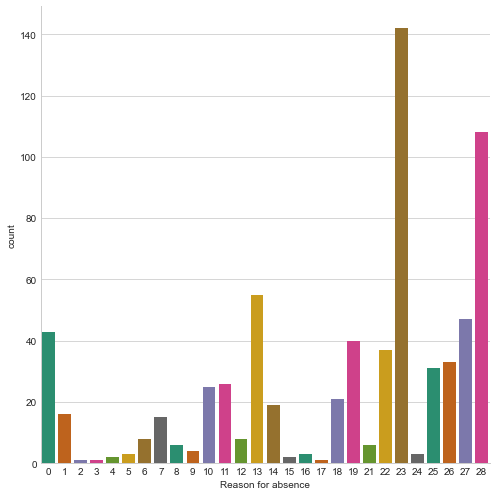

In [10]:
sns.catplot(data= df1, x='Reason for absence', kind = 'count', legend = True , palette ='Dark2', height =7)

In [11]:
total = df1['Reason for absence'].value_counts()
percent = pd.DataFrame((df1.groupby('Reason for absence').size()/df1.groupby('Reason for absence').size().sum()).sort_values()*100.00)
RFA_percent = pd.concat([total, percent], axis=1, keys=['total', 'percent'])

In [12]:
RFA_percent

,total,percent
,Reason for absence,0
23,142,20.113314
28,108,15.297450
13,55,7.790368
27,47,6.657224
0,43,6.090652
19,40,5.665722
22,37,5.240793
26,33,4.674221
25,31,4.390935


## Reason for Absence

 From the Analysis above on the Reason for Abesense, it can be seen that the most recorded reason for absence by an employee under health realated issues as the values used in the dataset have been pre-encoded to an interger representation each implying to a health related cause for absence at work.
 From the univarate analysis performed using a count plot, the 23rd factor (representing the blood donation category for the reason of absence) is the most frequent cause of absenteeism by employees, followed by   (28th factor), then followed next by Diseases of the musculoskeletal system and connective tissue (13th factor), these are the top 3 factors affecting the absenteeism of the employees under health related matters.
 
 Note : the Absenteeism time in time was used in this Analysis as the top Reason for Absence(health based) might not be the longest duration spent on being Absent.

1. Certain infectious and parasitic diseases  
2. Neoplasms  
3. Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism  
4. Endocrine, nutritional and metabolic diseases  
5. Mental and behavioural disorders  
6. Diseases of the nervous system  
7. Diseases of the eye and adnexa  
8. Diseases of the ear and mastoid process  
9. Diseases of the circulatory system  
10. Diseases of the respiratory system  
11. Diseases of the digestive system  
12. Diseases of the skin and subcutaneous tissue  
13. Diseases of the musculoskeletal system and connective tissue  
14. Diseases of the genitourinary system  
15. Pregnancy, childbirth and the puerperium  
16. Certain conditions originating in the perinatal period  
17. Congenital malformations, deformations and chromosomal abnormalities  
18. Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified  
19. Injury, poisoning and certain other consequences of external causes  
20. External causes of morbidity and mortality  
21. Factors influencing health status and contact with health services.

22. medical consultation 
23. blood donation 
24. laboratory examination
25. unjustified absence 
26. physiotherapy 
27. dental consultation 
28.

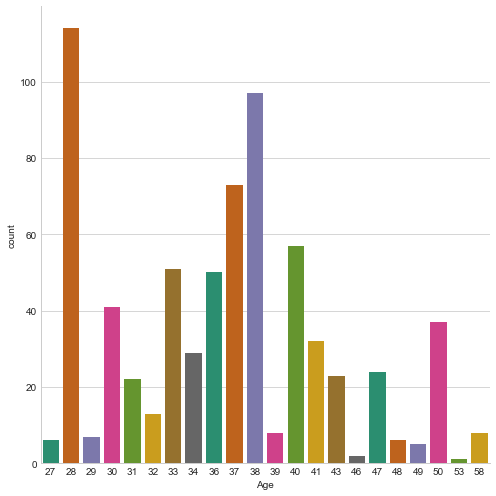

In [13]:
sns.catplot(data= df1, x='Age', kind = 'count', legend = True , palette ='Dark2', height=7)

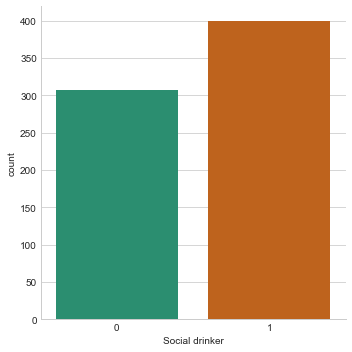

In [14]:
sns.catplot(data= df1, x='Social drinker', kind = 'count', legend = True , palette ='Dark2')

In [15]:
total = df1['Social drinker'].value_counts()
percent = pd.DataFrame((df1.groupby('Social drinker').size()/df1.groupby('Social drinker').size().sum()).sort_values()*100.00)
Ss_percent = pd.concat([total, percent], axis=1, keys=['total', 'percent'])

In [16]:
Ss_percent

,total,percent
,Social drinker,0
1,399,56.515581
0,307,43.484419


## Social drinker

    From the chart plotted above, it can be seen that about 57% of the time a record was taken of the absenteeism of the employees the employee is a social drinker and about 43% of the time the employee is a non-Social drinker

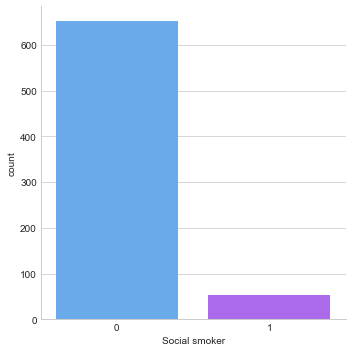

In [17]:
sns.catplot(data= df1, x='Social smoker', kind = 'count', legend = True , palette ='cool')

In [18]:
total = df1['Social smoker'].value_counts()
percent = pd.DataFrame((df1.groupby('Social smoker').size()/df1.groupby('Social smoker').size().sum()).sort_values()*100.00)
Sd_percent = pd.concat([total, percent], axis=1, keys=['total', 'percent'])

In [19]:
Sd_percent

,total,percent
,Social smoker,0
0,652,92.351275
1,54,7.648725


## Social smoker

    From the chart plotted above, it can be seen that about 7% of the time the record was taken of the absenteeism of the employees, the employee was a social smoker and about 92% of the time the employee is a non-Social smoker.

In [20]:
total = df1['Month of absence'].value_counts()
percent = pd.DataFrame((df1.groupby('Month of absence').size()/df1.groupby('Month of absence').size().sum()).sort_values()*100.00)
Ma_percent = pd.concat([total, percent], axis=1, keys=['total', 'percent'])

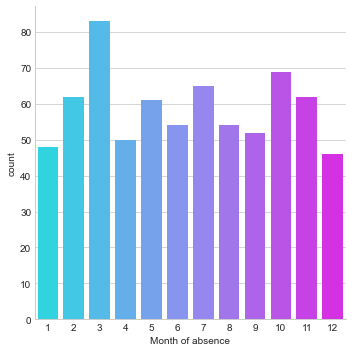

In [21]:
df1['Month of absence'] = df1['Month of absence'].replace((0), (1 ))
sns.catplot(data= df1, x='Month of absence', kind = 'count', legend = True , palette ='cool')

In [22]:
Ma_percent

,total,percent
,Month of absence,0
3,83,11.756374
10,69,9.773371
7,65,9.206799
11,62,8.781870
2,62,8.781870
5,61,8.640227
8,54,7.648725
6,54,7.648725
9,52,7.365439


## Month of Absence 

1. January
2. Febuary
3. March
4. April
5. May
6. June
7. July
8. August
9. September
10. Octomber
11. November
12. December


    The month with the most record was the 3rd month being the month of March with about 12% frequency of all the time records were taken 

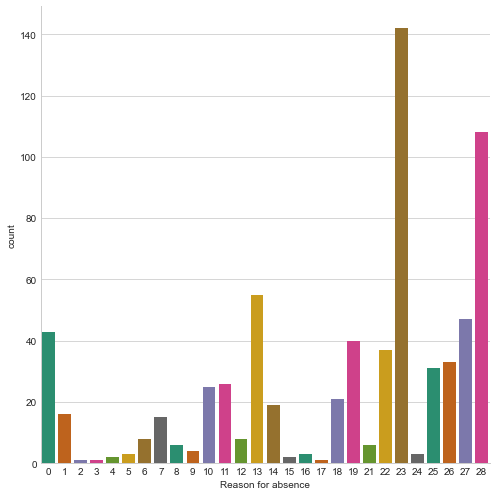

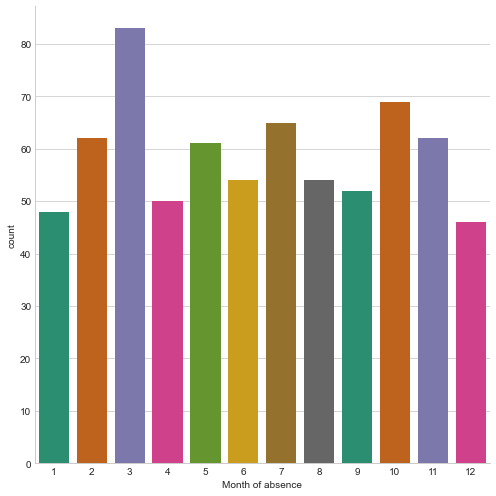

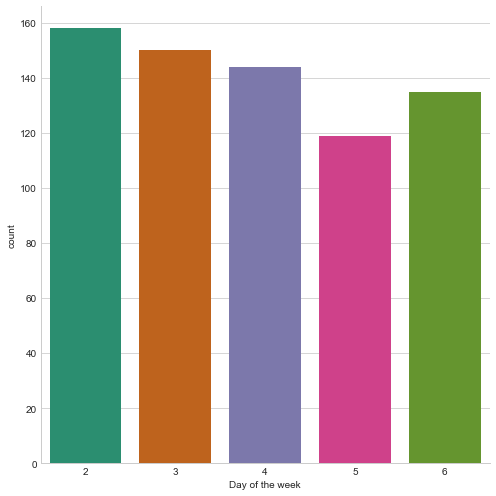

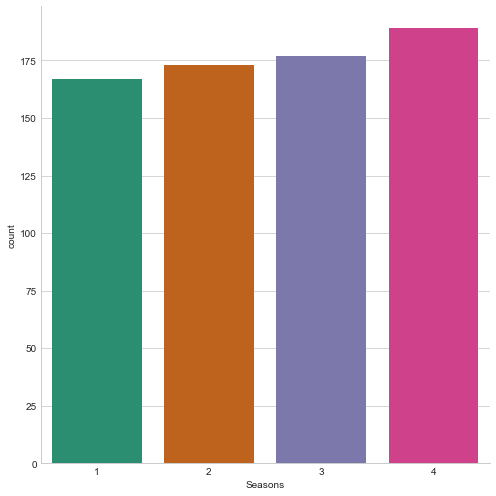

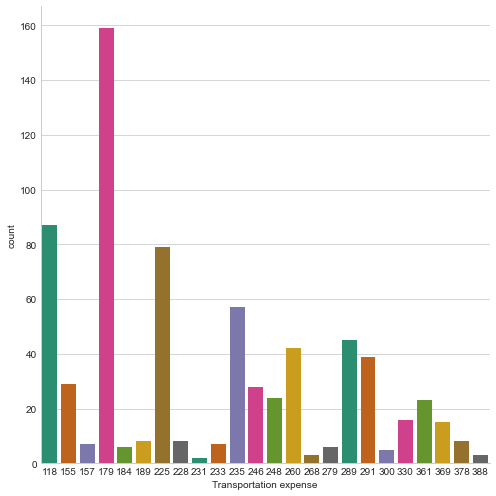

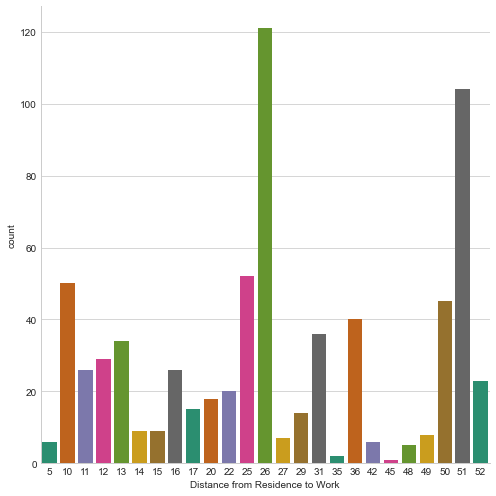

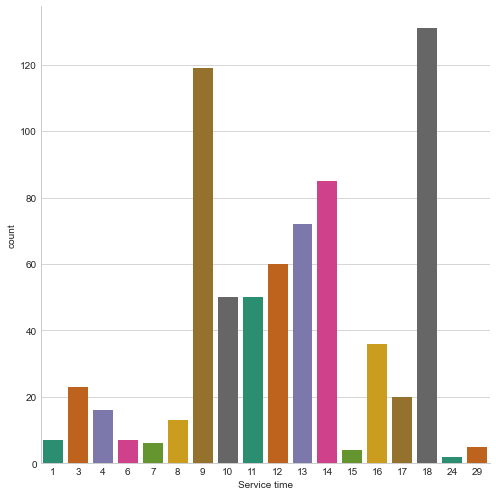

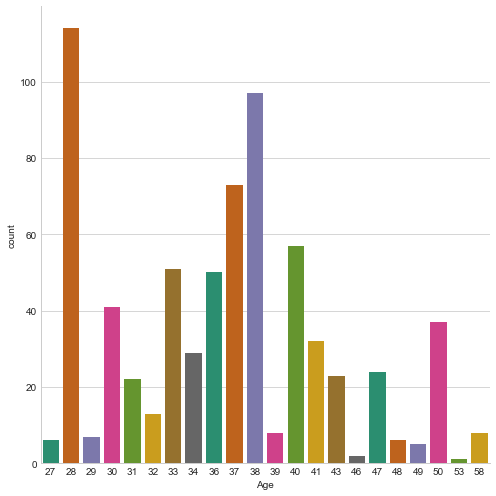

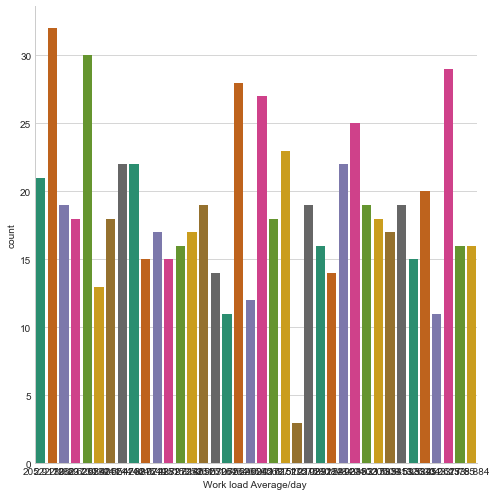

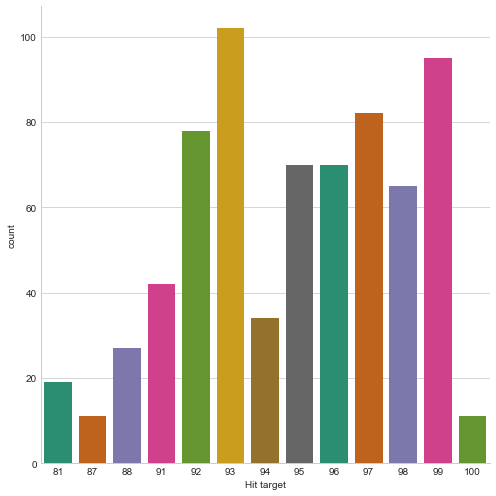

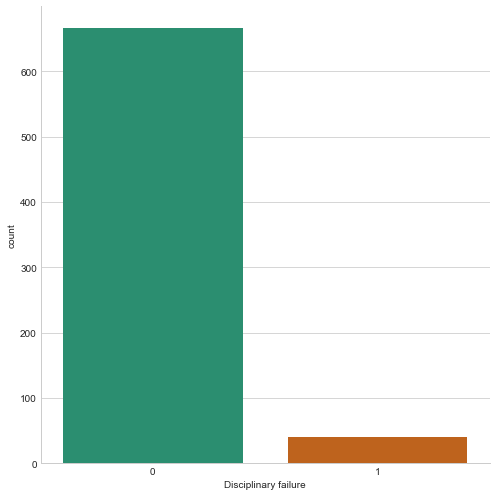

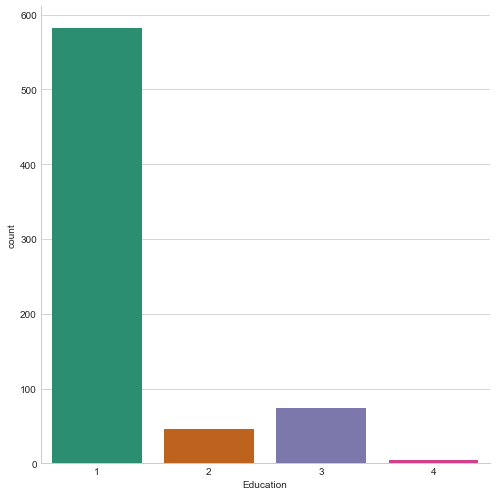

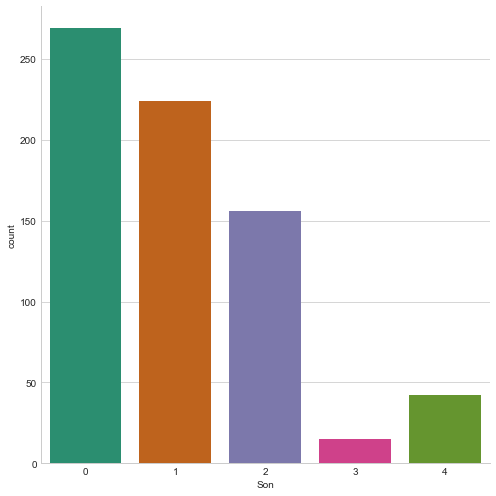

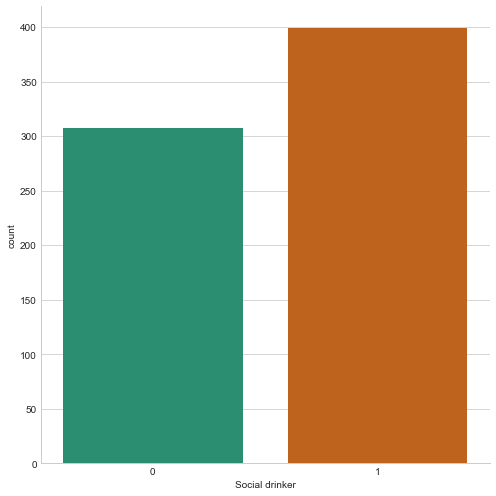

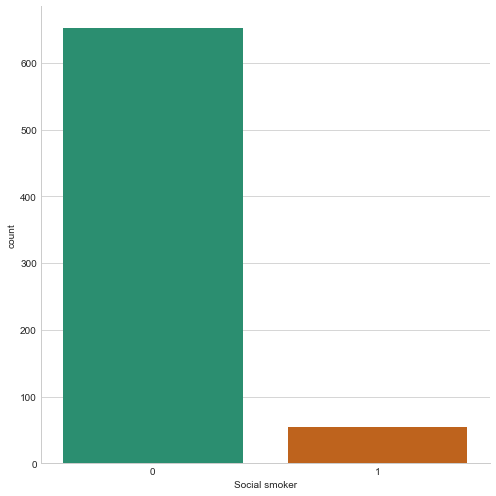

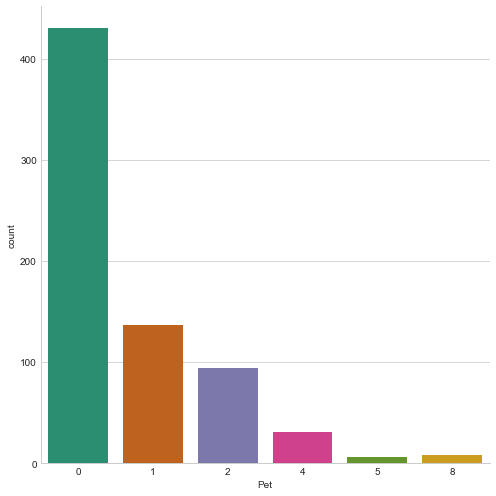

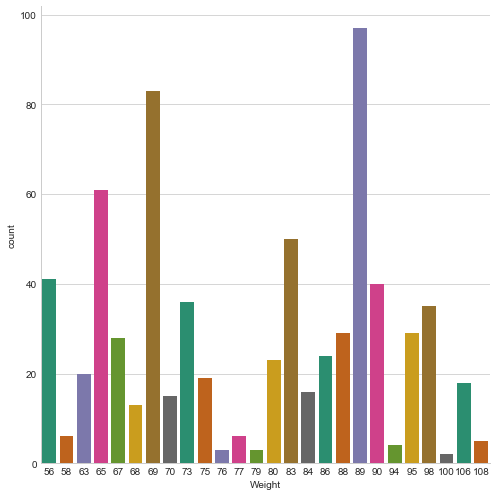

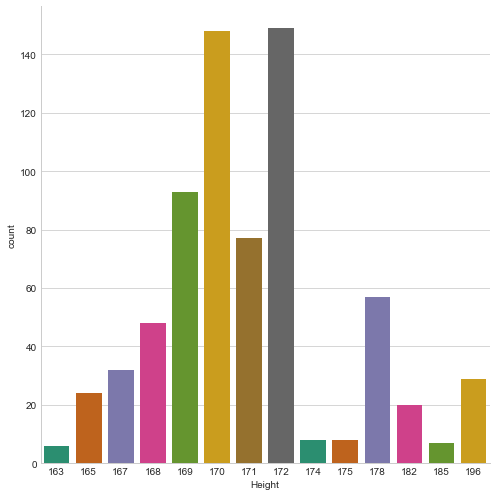

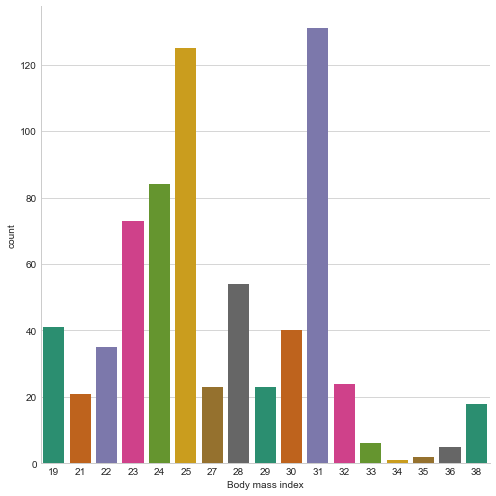

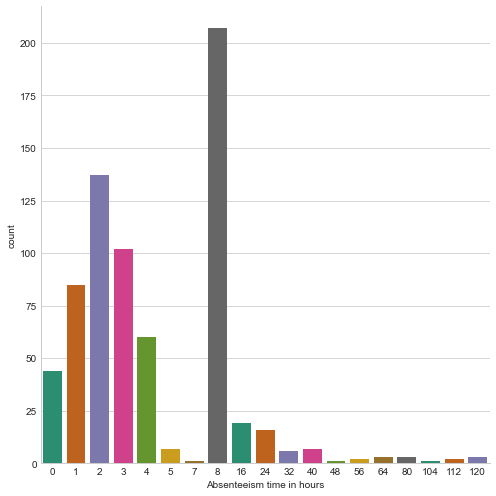

In [23]:
for col in df1.columns.to_list():
    sns.catplot(data= df1, x=col, kind = 'count', legend = True , palette ='Dark2', height =7)
    plt.show()

# Analysis for other features can easily be drawn from the plots made above 

1. like the day of the week where more abseneeism records were made on the second day of the week being Monday followed by the third day and then wednesday, friday and thursday being the least. 
2. The age groups were it shows that the Age group with the most records of absenteeism are age groups from 33-43yrs with 36yrs being the peak among this group and 26yrs being the overall peak of age group that has the most records in our dataset
   
   other deductions can be made easily by just a mere look at the visualization above.
   


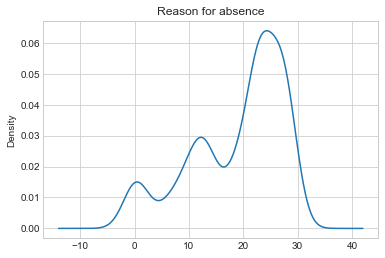

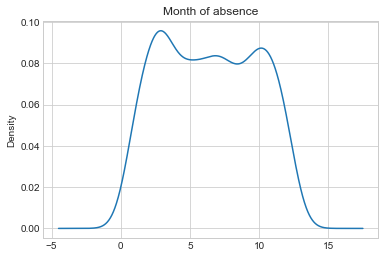

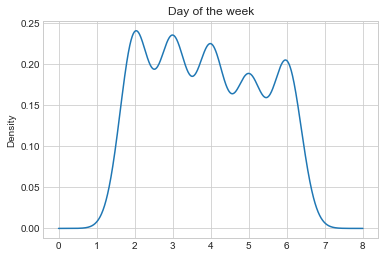

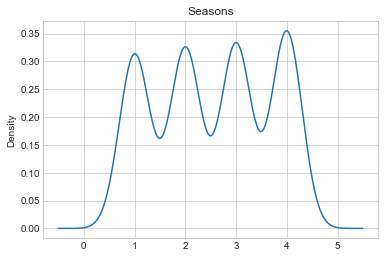

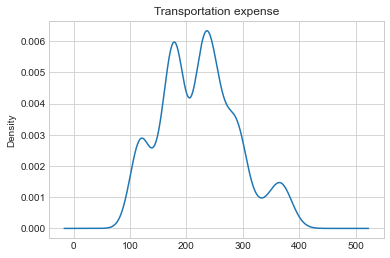

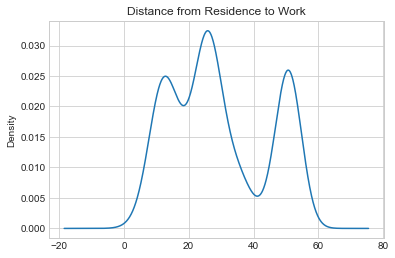

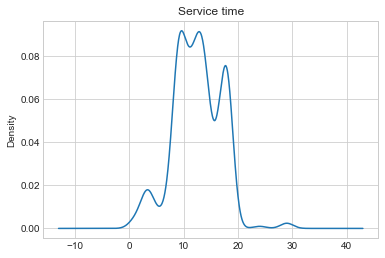

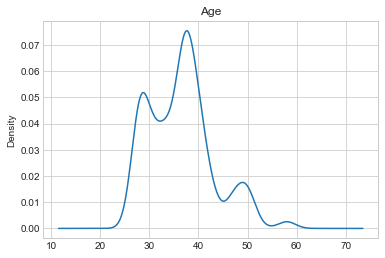

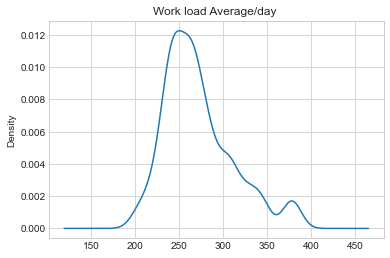

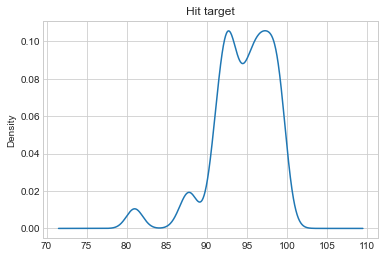

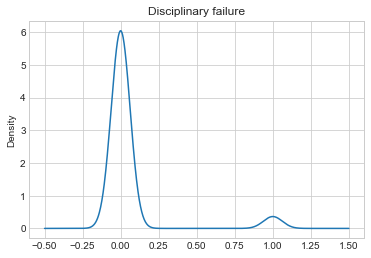

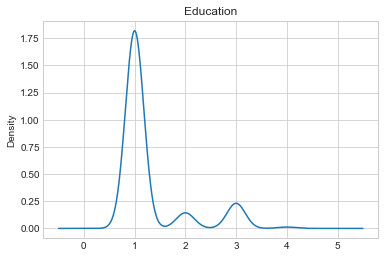

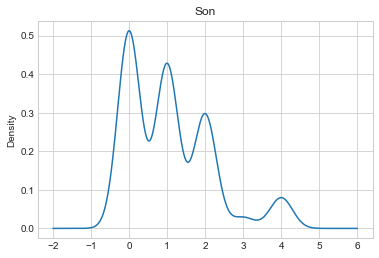

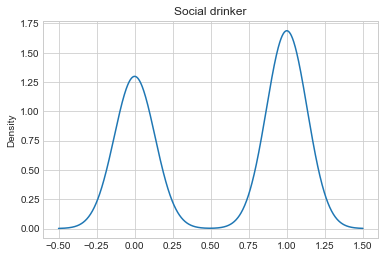

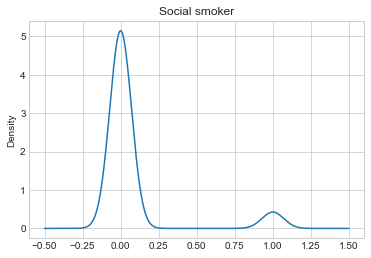

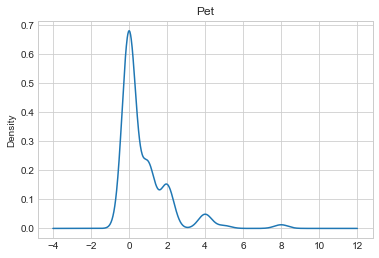

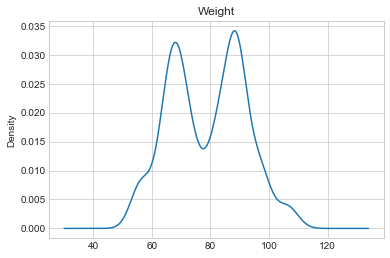

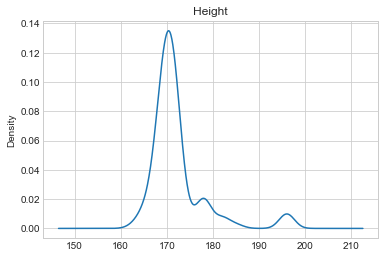

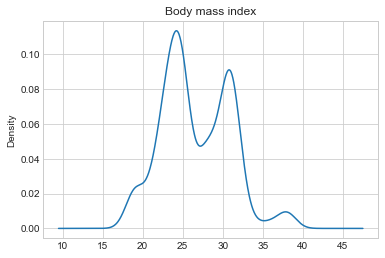

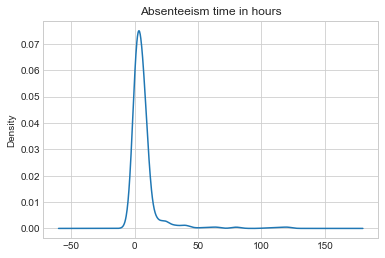

In [24]:
for col in df1.columns.to_list():
    df1[col].plot(kind= 'density')
    plt.title(col)
    plt.show()

# Feature behaviours 

 From the density plot created above for all individual features it can be seen that most of the features are not normally distributed and having different peak intervals, these can be explained as some of the features with multiple peaks are those with real life representations as having peaks at intervals for instance the season  feature can be seen having four different peaks at intervals which can be attributed to the peaks of the various seasons witnessed.
 
 For the normality of our dataset, effort will be made to rescale and standarddize our dataset to reduce it skewness and varying ranges.

In [25]:
df2= df1.copy()
Y = df1.pop('Absenteeism time in hours')
X = df1

In [26]:
X.head(2)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
ID,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31


### The supposed target class have been removed from  our dataset as it won't be manipulated or called the fit()  operation on.

In [27]:
minmaxscaler = MinMaxScaler(feature_range = (0,1))
scaled_df1 = minmaxscaler.fit_transform(X)
scaledx = pd.DataFrame(scaled_df1, columns = X.columns)

In [28]:
scaler = StandardScaler()
rescaled_df1= scaler.fit_transform(scaledx)
RescaledX = pd.DataFrame(rescaled_df1, columns = df1.columns)

In [29]:
RescaledX.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
count,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02,7.060000e+02
mean,1.622876e-16,-3.208010e-17,-5.032172e-18,4.076060e-16,-7.045041e-17,-3.176559e-17,2.171697e-16,6.227313e-17,-2.297845e-15,-4.539177e-16,1.826521e-16,1.136642e-15,1.703076e-16,-6.491502e-16,-1.265906e-16,1.570195e-16,4.179062e-17,-2.015228e-16,3.451756e-17
std,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00,1.000709e+00
min,-2.227525e+00,-1.594994e+00,-1.327444e+00,-1.382645e+00,-1.561100e+00,-1.653311e+00,-2.632357e+00,-1.445206e+00,-1.678204e+00,-3.564217e+00,-2.450715e-01,-4.348353e-01,-9.610236e-01,-1.140033e+00,-2.877883e-01,-5.772426e-01,-1.789852e+00,-1.495025e+00,-1.795904e+00
25%,-6.939399e-01,-1.005894e+00,-6.254398e-01,-4.903714e-01,-6.539794e-01,-9.048198e-01,-8.004752e-01,-8.353345e-01,-7.025718e-01,-6.045941e-01,-2.450715e-01,-4.348353e-01,-9.610236e-01,-1.140033e+00,-2.877883e-01,-5.772426e-01,-7.784457e-01,-5.202787e-01,-6.199548e-01
50%,4.857412e-01,-1.222426e-01,7.656417e-02,4.019023e-01,3.007867e-02,-2.243737e-01,1.154656e-01,7.947340e-02,-1.898511e-01,1.188693e-01,-2.450715e-01,-4.348353e-01,-5.517225e-02,8.771679e-01,-2.877883e-01,-5.772426e-01,7.735970e-02,-1.953634e-01,-3.847651e-01
75%,8.396455e-01,9.823211e-01,7.785682e-01,1.294176e+00,5.505577e-01,1.340652e+00,8.024213e-01,5.368773e-01,5.611604e-01,6.450246e-01,-2.450715e-01,-4.348353e-01,8.506791e-01,8.771679e-01,-2.877883e-01,1.732791e-01,7.775642e-01,-3.290573e-02,1.026373e+00
max,1.075582e+00,1.645059e+00,1.480572e+00,1.294176e+00,2.454024e+00,1.544786e+00,3.779229e+00,3.281301e+00,2.708389e+00,1.434257e+00,4.080441e+00,4.035947e+00,2.662382e+00,8.771679e-01,3.474777e+00,5.426931e+00,2.255774e+00,3.866078e+00,2.672702e+00


In [30]:
normalizer = Normalizer()
normalized_df3= normalizer.fit_transform(RescaledX)
Normalizedx = pd.DataFrame(normalized_df3, columns = df1.columns)

## Movers

#### To Know the top movers of the Absenteeism of employees at work as represented in a sample with our dataset, i checked for the relationship between each feature/attribute in our dataset with the target class (Absenteeism time in hours)

In [31]:
corrmat = df2.corr()

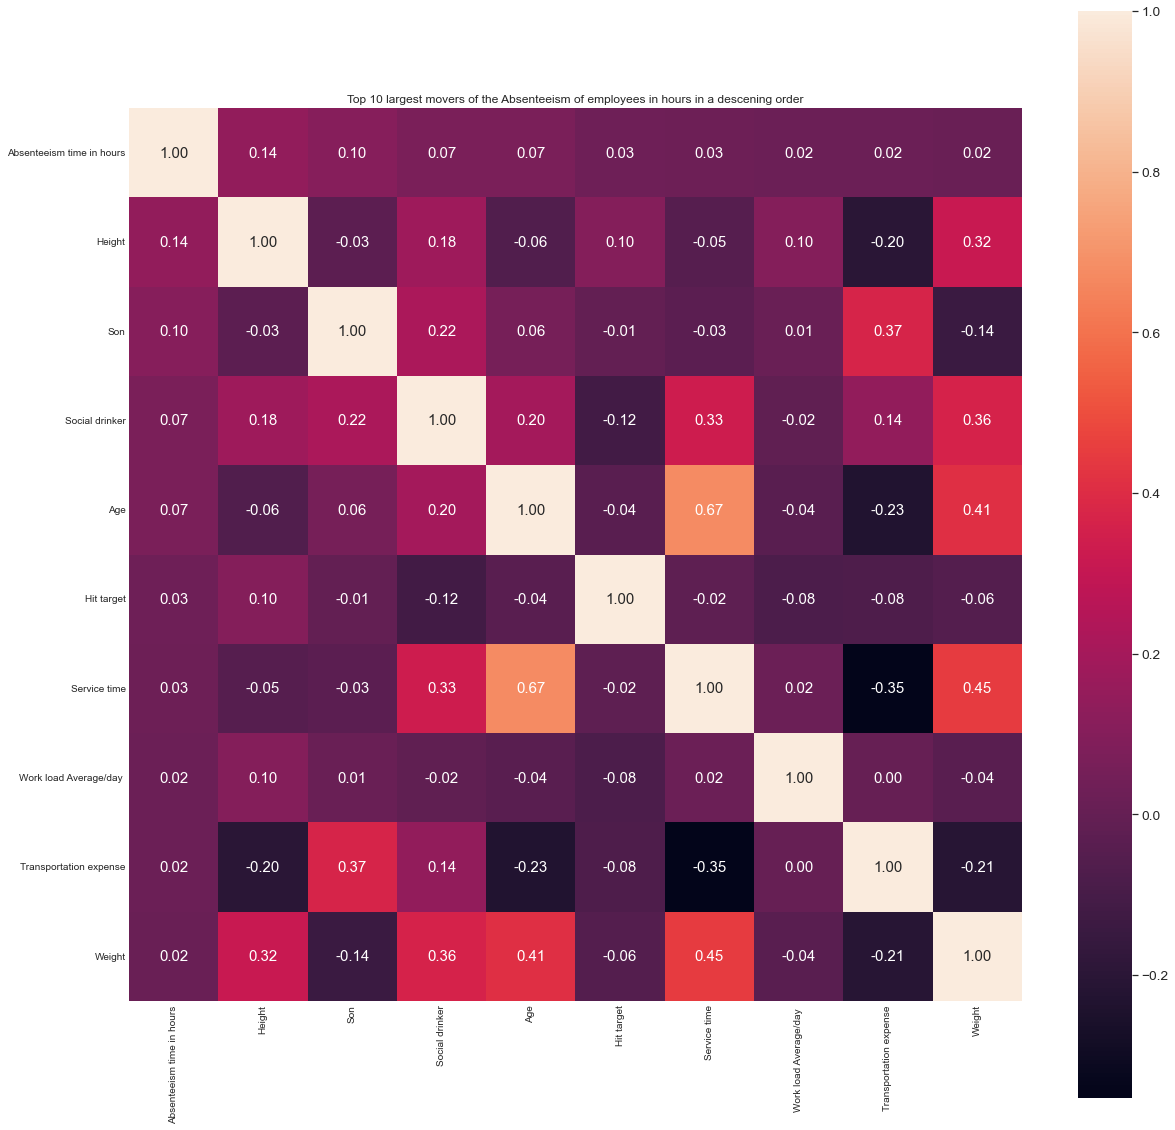

In [32]:
k = 10 #number for the 10 top largest movers of the Absenteeism of employees in hours

plt.figure(figsize=(20,20))
plt.title('Top 10 largest movers of the Absenteeism of employees in hours in a descening order')
cols = corrmat.nlargest(k, 'Absenteeism time in hours')['Absenteeism time in hours'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()




## Top 10 largest movers of the Absenteeism of employees in hours in a descening order

In [33]:
colss = corrmat.nlargest(k, 'Absenteeism time in hours')['Absenteeism time in hours']
colss

Absenteeism time in hours    1.000000
Height                       0.140121
Son                          0.102455
Social drinker               0.067850
Age                          0.065822
Hit target                   0.029886
Service time                 0.025472
Work load Average/day        0.020150
Transportation expense       0.018275
Weight                       0.016632
Name: Absenteeism time in hours, dtype: float64

In [38]:
discrete_features = X.dtypes == int
from sklearn.feature_selection import mutual_info_regression

In [39]:
def make_mi_scores(X, Y, discrete_features):
    mi_scores = mutual_info_regression(X, Y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, Y, discrete_features)
mi_scores  # show a few features with their MI scores

Reason for absence                 0.566488
Disciplinary failure               0.196080
Service time                       0.178359
Distance from Residence to Work    0.134432
Weight                             0.132371
Body mass index                    0.130840
Work load Average/day              0.129833
Transportation expense             0.104219
Age                                0.092934
Height                             0.074326
Month of absence                   0.063342
Social smoker                      0.033530
Hit target                         0.030543
Son                                0.026352
Day of the week                    0.023998
Seasons                            0.011060
Pet                                0.001967
Education                          0.000000
Social drinker                     0.000000
Name: MI Scores, dtype: float64

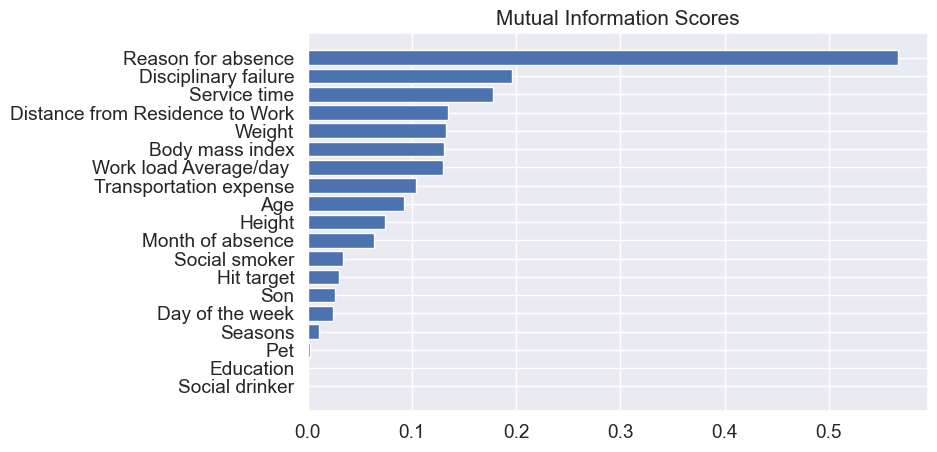

In [40]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)